## Subsidence map of the Netherlands

In [32]:
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show
from matplotlib.colors import Normalize

In [130]:
def plot_tiff(tiff_files):
    
    # raster = rasterio.open(tiff_file)
    # show(raster.read(),cmap="viridis", vmin = -9999, vmax = data.max)
    # plt.colorbar()

    fig, ax = plt.subplots(1, len(tiff_files), figsize = (5*len(tiff_files), 5))

    data_lst = []
    minv, maxv = float('inf'), float('-inf')
    for tf in tiff_files:
        with rasterio.open(tf) as dataset:
            data = dataset.read(1)  # Read the first band

        # Display the image with colorbar
        min, max = np.nanmin(data), np.nanmax(data)
        if min < minv: minv = min
        if max > maxv: maxv = max

        data_lst.append(data)
    
    for i, d in enumerate(data_lst):
        show(d, cmap='viridis_r', ax=ax[i], vmin = minv, vmax =maxv)

    # Create a ScalarMappable object and colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=Normalize(vmin= minv, vmax= maxv))
    sm._A = []
    cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
    fig.colorbar(sm, cax=cbar_ax)

In [131]:
f_mild = r'P:\11208003-latedeo2022\020_InternationalDeltaPortfolio\00_bodemdalingsvoorspellingskaarten\Mild scenario\scenario_mild_bodemdaling_incl_ogzw_2020_2100.tif'
f_high = r'P:\11208003-latedeo2022\020_InternationalDeltaPortfolio\00_bodemdalingsvoorspellingskaarten\Sterk scenario\scenario_sterk_bodemdaling_incl_ogzw_2020_2100.tif'

#### Mild scenario

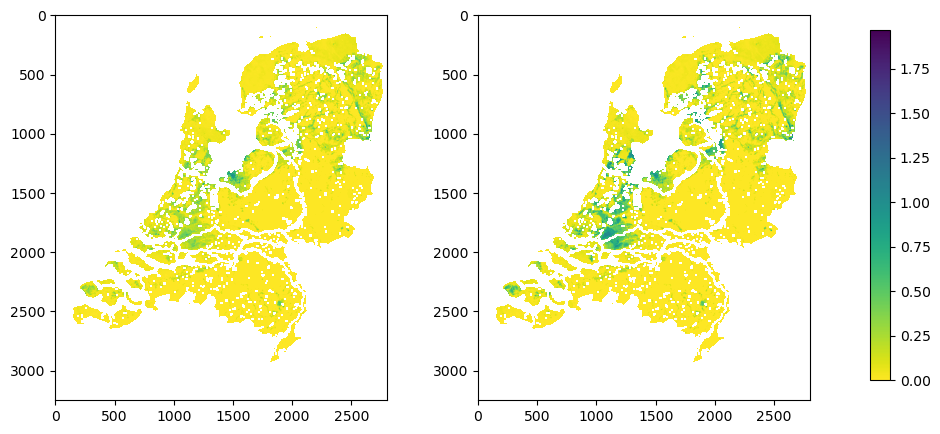

In [132]:
files = [f_mild, f_high]

plot_tiff(files)